# Convergence analysis of MD simulations



### Requisits

You have to run the cell containing the dependencies imports before starting to run the code. An easy way to have all_loop these dependencies install_looped is to create a conda environment with:

`conda create -n md_analysis -c anaconda -c conda-forge -c ambermd jupyter pytraj mdtraj matplotlib scikit-learn`



In [1]:
%matplotlib inline
import pytraj as pt
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
# call matrix module
from pytraj import matrix
import time

## 0. Selection of atoms object of study
Before starting the convergence analyses, the first thing is to define which part of the system will be object of study. 

Typicall_loopy, very flexible parts such as terminal residues are avoid, and representative atoms of the backbone like alpha carbons are selected.

#### 0.1 Load the trajectory and topology files
Different possibilities are given (some commented) depending on the format of the trajectory files.
Possibilities if the MDs are loaded with pytraj:(basicall_loopy amber formats)

http://amber-md.github.io/pytraj/latest/read_and_write.html

If the MDs are loaded with mdtraj, we have more possibilities, including xtc (gromacs) +pdb for topology, or a pdb traj.
http://mdtraj.org/1.6.2/load_functions.html#the-trajectory-object

We indicate also the length of the trajectory in ns only for correct axis labels in plots.

In [2]:
#Read md1
TRAJECTORY_FILENAME1 = '/home/pborges/analysis/wtB_300/traj/wtB-300-1-nowat-aligned.dcd'  # To be used with md.load below
TOPOLOGY_FILENAME = '/home/pborges/analysis/wtB_300/traj/wtB_nowat.prmtop'

TRAJECTORY_LENGTH = 1000 #Length of the trajectory in ns (for correct axis labels in plots)

traj01 = pt.load(TRAJECTORY_FILENAME1, TOPOLOGY_FILENAME)

traj01

pytraj.Trajectory, 10001 frames: 
Size: 0.984469 (GB)
<Topology: 4404 atoms, 287 residues, 1 mols, non-PBC>
           

pytraj.Trajectory, 10001 frames: 
Size: 0.984469 (GB)
<Topology: 4404 atoms, 287 residues, 1 mols, non-PBC>
           

In [3]:
#Read md2
TRAJECTORY_FILENAME2 = '/home/pborges/analysis/wtB_300/traj/wtB-300-2-nowat-aligned.dcd'  # To be used with md.load below

TRAJECTORY_LENGTH = 1000 #Length of the trajectory in ns (for correct axis labels in plots)

traj02 = pt.load(TRAJECTORY_FILENAME2, TOPOLOGY_FILENAME)

traj02


pytraj.Trajectory, 10001 frames: 
Size: 0.984469 (GB)
<Topology: 4404 atoms, 287 residues, 1 mols, non-PBC>
           

In [4]:
#Read md3
TRAJECTORY_FILENAME3 = '/home/pborges/analysis/wtB_300/traj/wtB-300-3-nowat-aligned.dcd'  # To be used with md.load below

TRAJECTORY_LENGTH = 1000 #Length of the trajectory in ns (for correct axis labels in plots)

traj03 = pt.load(TRAJECTORY_FILENAME3, TOPOLOGY_FILENAME)

traj03

pytraj.Trajectory, 10001 frames: 
Size: 0.984469 (GB)
<Topology: 4404 atoms, 287 residues, 1 mols, non-PBC>
           

In [5]:
#Read md-all (concatenated md1+md2+md3)

TRAJECTORY_FILENAME = '/home/pborges/analysis/wtB_300/traj/wtB-300-all-nowat-aligned.dcd'  # To be used with md.load below

TRAJECTORY_LENGTH_ALL = 3000 #Length of the trajectory in ns (for correct axis labels in plots)

traj0all = pt.load(TRAJECTORY_FILENAME, TOPOLOGY_FILENAME)

traj0all

pytraj.Trajectory, 30002 frames: 
Size: 2.953309 (GB)
<Topology: 4404 atoms, 287 residues, 1 mols, non-PBC>
           

#### 0.2 Select the atoms that will be object of the study and align core
We use the notation of pytraj to select the atoms:

https://amber-md.github.io/pytraj/latest/atom_mask_selection.html


In [6]:
# This will be used for initial fitting. 
ref_SELECTION = '(:1-284)&(@CA))'  #takes Calpha of protein residues
# This corresponds to all Ca. Used for RMSD.
SELECTION = '(:1-284)&(@CA)'


Now the initial tajectory will be aligned. So no need to load aligned trajectory. Here only core protein is used for alignment.

In [7]:
#align md1 trajectory (1us)
trajectory1 = pt.align(traj01, ref=0, ref_mask='ref_SELECTION', mass=False, top=None, frame_indices=None)
trajectory1[SELECTION]

pytraj.Trajectory, 10001 frames: 
Size: 0.063485 (GB)
<Topology: 284 atoms, 284 residues, 284 mols, non-PBC>
           

In [8]:
#align md2 trajectory (1us)
trajectory2 = pt.align(traj02, ref=0, ref_mask='ref_SELECTION', mass=False, top=None, frame_indices=None)
trajectory2[SELECTION]

pytraj.Trajectory, 10001 frames: 
Size: 0.063485 (GB)
<Topology: 284 atoms, 284 residues, 284 mols, non-PBC>
           

In [9]:
#align md3 trajectory (1us)
trajectory3 = pt.align(traj03, ref=0, ref_mask='ref_SELECTION', mass=False, top=None, frame_indices=None)
trajectory3[SELECTION]

pytraj.Trajectory, 10001 frames: 
Size: 0.063485 (GB)
<Topology: 284 atoms, 284 residues, 284 mols, non-PBC>
           

In [10]:
#align concatennated trajectory (3us)
trajectoryall = pt.align(traj0all, ref=0, ref_mask='ref_SELECTION', mass=False, top=None, frame_indices=None)
trajectoryall[SELECTION]

pytraj.Trajectory, 30002 frames: 
Size: 0.190450 (GB)
<Topology: 284 atoms, 284 residues, 284 mols, non-PBC>
           

## 1. RMSD from the first frame
- If the plot does not reach a steady state (meaning on that may fluctuate significantly, but has no significant trend), the system is clearly not converged. [1]
- It is of limited utility, because it contains little information about what states are being sampled. [1]
- It should be considered as an equilibration test, starting the "production part" of the MD when the RMSD achieves a plateau after the curve has increased rapidly at the begining. This "equilibration" part should be discarded in further production analyses. [2]

Calculate RMSD of all_loop frames with respect to the first frame

<Figure size 432x288 with 0 Axes>

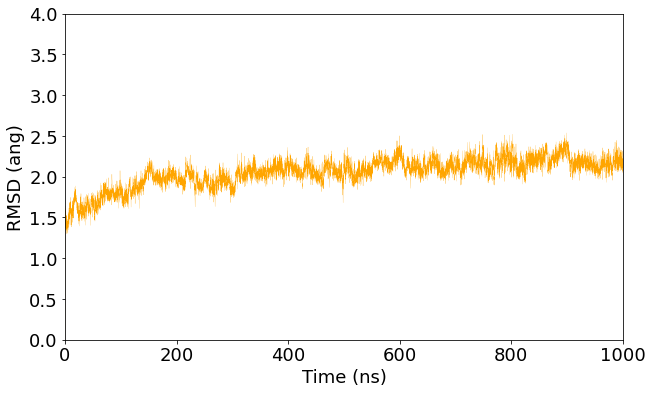

In [11]:
#RMSD md1

distances1 = pt.analysis.rmsd.rmsd(traj=trajectory1, mask=SELECTION, ref=0, update_coordinate=False, nofit=True)  #NoFit because I aligned before only core

RMSD_PLOT_FILENAME1 = './wtB-300-1-RMSD.png' #Output filename for the plot
RMSD_COLOR1 = 'orange' #Color of the line
MAX_RMSD1 = math.ceil(distances1.max()) #It can be modified if you want to change the scale of the plot
RMSD_DATA_FILE1 = "./wtB-300-1-RMSD.txt" #Text file to store RMSD data

plt.figure()
#plt.plot([TRAJECTORY_LENGTH*a/len(distances) for a in range(len(10*distances))], 10*distances, linewidth=0.2, color=RMSD_COLOR)
plt.rcParams['font.size']=18
plt.figure(figsize=(10,6))

plt.plot([TRAJECTORY_LENGTH*a/len(distances1) for a in range(len(distances1))], distances1, linewidth=0.2, color=RMSD_COLOR1)
plt.ylim(0, 4)
plt.xlim(0, TRAJECTORY_LENGTH)
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (ang)')
plt.savefig(RMSD_PLOT_FILENAME1, bbox_inches='tight')

#And write the data into a text file
with open(RMSD_DATA_FILE1, "w") as f:
    for a, d in enumerate(distances1):
        f.write("%f\t%f\n" %(TRAJECTORY_LENGTH*a/len(distances1), d))  #no 10 for dcd as they are in angstroms

<Figure size 432x288 with 0 Axes>

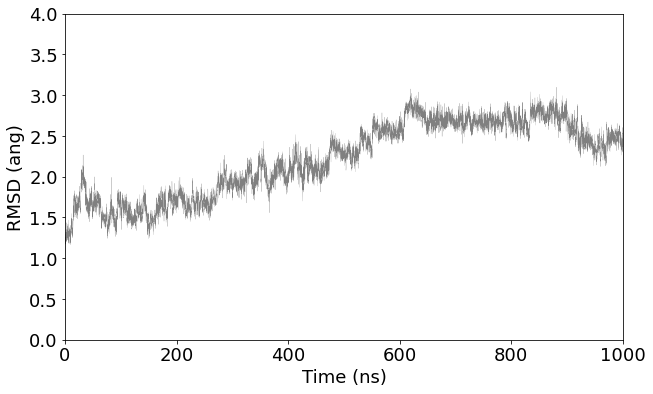

In [12]:
#RMSD md2

distances2 = pt.analysis.rmsd.rmsd(traj=trajectory2, mask=SELECTION, ref=0, update_coordinate=False, nofit=True)  #NoFit because I aligned before only core

RMSD_PLOT_FILENAME2 = './wtB-300-2-RMSD.png' #Output filename for the plot
RMSD_COLOR2 = 'gray' #Color of the line
MAX_RMSD2 = math.ceil(distances2.max()) #It can be modified if you want to change the scale of the plot
RMSD_DATA_FILE2 = "./wtB-300-2-RMSD.txt" #Text file to store RMSD data

plt.figure()
#plt.plot([TRAJECTORY_LENGTH*a/len(distances) for a in range(len(10*distances))], 10*distances, linewidth=0.2, color=RMSD_COLOR)
plt.rcParams['font.size']=18
plt.figure(figsize=(10,6))

plt.plot([TRAJECTORY_LENGTH*a/len(distances2) for a in range(len(distances2))], distances2, linewidth=0.2, color=RMSD_COLOR2)
plt.ylim(0, 4)
plt.xlim(0, TRAJECTORY_LENGTH)
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (ang)')
plt.savefig(RMSD_PLOT_FILENAME2, bbox_inches='tight')

#And write the data into a text file
with open(RMSD_DATA_FILE2, "w") as f:
    for a, d in enumerate(distances2):
        f.write("%f\t%f\n" %(TRAJECTORY_LENGTH*a/len(distances2), d))  #no 10 for dcd as they are in angstroms

<Figure size 432x288 with 0 Axes>

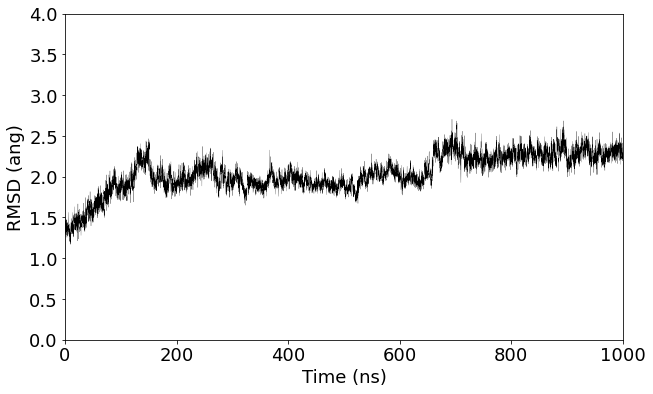

In [13]:
#RMSD md3

distances3 = pt.analysis.rmsd.rmsd(traj=trajectory3, mask=SELECTION, ref=0, update_coordinate=False, nofit=True)  #NoFit because I aligned before only core

RMSD_PLOT_FILENAME3 = './wtB-300-3-RMSD.png' #Output filename for the plot
RMSD_COLOR3 = 'black' #Color of the line
MAX_RMSD3 = math.ceil(distances3.max()) #It can be modified if you want to change the scale of the plot
RMSD_DATA_FILE3 = "./wtB-300-3-RMSD.txt" #Text file to store RMSD data

plt.figure()
#plt.plot([TRAJECTORY_LENGTH*a/len(distances) for a in range(len(10*distances))], 10*distances, linewidth=0.2, color=RMSD_COLOR)
plt.rcParams['font.size']=18
plt.figure(figsize=(10,6))

plt.plot([TRAJECTORY_LENGTH*a/len(distances3) for a in range(len(distances3))], distances3, linewidth=0.2, color=RMSD_COLOR3)
plt.ylim(0, 4)
plt.xlim(0, TRAJECTORY_LENGTH)
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (ang)')
plt.savefig(RMSD_PLOT_FILENAME3, bbox_inches='tight')

#And write the data into a text file
with open(RMSD_DATA_FILE3, "w") as f:
    for a, d in enumerate(distances3):
        f.write("%f\t%f\n" %(TRAJECTORY_LENGTH*a/len(distances3), d))  #no 10 for dcd as they are in angstroms

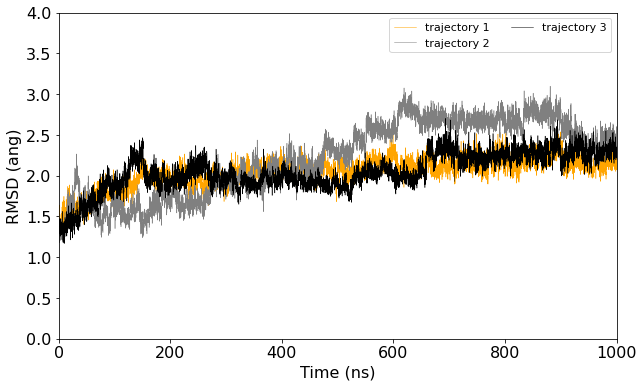

2.1034541118003056

In [14]:
##PENDING TASK
#RMSD the three together
rmsd1 = pt.analysis.rmsd.rmsd(traj=trajectory1, mask=SELECTION, ref=0, update_coordinate=False, nofit=True)  #NoFit because I aligned before only core
rmsd2 = pt.analysis.rmsd.rmsd(traj=trajectory2, mask=SELECTION, ref=0, update_coordinate=False, nofit=True)  #NoFit because I aligned before only core
rmsd3 = pt.analysis.rmsd.rmsd(traj=trajectory3, mask=SELECTION, ref=0, update_coordinate=False, nofit=True)  #NoFit because I aligned before only core

RMSD_PLOT_FILENAME = './wtB-300-RMSD.png' #Output filename for the plot
RMSD_COLOR1 = 'orange' #Color of the line
RMSD_COLOR2 = 'gray' #Color of the line
RMSD_COLOR3 = 'black' #Color of the line
MAX_RMSD = math.ceil(rmsd3.max()) #It can be modified if you want to change the scale of the plot
RMSD_DATA_FILE = "./wtB-300-RMSD.txt" #Text file to store RMSD data


#Plot the figure
plt.rcParams['font.size']=16
plt.figure(figsize=(10,6))
plt.ylim(0, 4)
plt.xlim(0, TRAJECTORY_LENGTH)
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (ang)')

plt.plot([TRAJECTORY_LENGTH*a/len(rmsd1) for a in range(len(rmsd1))], 
         rmsd1, linewidth=0.5, color=RMSD_COLOR1, label="trajectory 1") #If xtc as units are nm (remove *10 if not)
plt.plot([TRAJECTORY_LENGTH*a/len(rmsd2) for a in range(len(rmsd2))], 
         rmsd2, linewidth=0.5, color=RMSD_COLOR2, label="trajectory 2") #If xtc as units are nm (remove *10 if not)
plt.plot([TRAJECTORY_LENGTH*a/len(rmsd3) for a in range(len(rmsd3))], 
         rmsd3, linewidth=0.5, color=RMSD_COLOR3, label="trajectory 3") #If xtc as units are nm (remove *10 if not)

plt.legend(fontsize=11, bbox_to_anchor =(1, 1), ncol = 2)

plt.savefig(RMSD_PLOT_FILENAME, bbox_inches='tight')
plt.show()

myrmsd = [rmsd1, rmsd2, rmsd3] 
np.mean(myrmsd)
       
        

In [15]:
np.std(myrmsd)

0.32504555366366156

## 2. Radius of gyration 

18.870661969177974

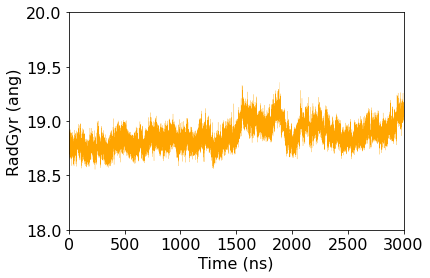

In [32]:
#For all
rg_data = pt.radgyr(trajectoryall)

Radgyr_PLOT_FILENAME = './wtB-300-Radgyr.png' #Output filename for the plot
Radgyr_COLOR = 'orange' #Color of the line
MAX_Radgyr = math.ceil(rg_data.max()) #It can be modified if you want to change the scale of the plot
Radgyr_DATA_FILE = "./wtB-300-RadGyr.txt" #Text file to store RMSD data

plt.figure()
plt.plot([TRAJECTORY_LENGTH_ALL*a/len(rg_data) for a in range(len(rg_data))], rg_data, linewidth=0.2, color=Radgyr_COLOR)
plt.ylim(18, 20)
plt.xlim(0, TRAJECTORY_LENGTH_ALL)
plt.xlabel('Time (ns)')
plt.ylabel('RadGyr (ang)')
plt.savefig(Radgyr_PLOT_FILENAME, bbox_inches='tight')

#And write the data into a text file
with open(Radgyr_DATA_FILE, "w") as f:
    for a, d in enumerate(rg_data):
        f.write("%f\t%f\n" %(TRAJECTORY_LENGTH_ALL*a/len(rg_data), d))  #no 10 for dcd as they are in angstroms
np.mean(rg_data)

In [33]:
np.std(rg_data)

0.11373313225359963

##### 2. RMSF to average structure

To calculate atomic fluctuations around the average structure, this has first to be obtained.

In [11]:
aver_frame = pt.mean_structure(trajectoryall, rmsfit=None)  # No fitting as we did it before
#Now align traj to this frame (only core protein)
traj_rmsf = pt.align(trajectoryall, ref=aver_frame, ref_mask='ref_SELECTION')
#Now get the RMSF related to averaged sturcture
rmsf_data = pt.rmsf(traj_rmsf, mask='@CA', options='byres')
rmsf_data


array([[  1.        ,   1.08183984],
       [  2.        ,   0.8348925 ],
       [  3.        ,   0.76212454],
       ...,
       [282.        ,   1.75271002],
       [283.        ,   1.60625392],
       [284.        ,   3.19723178]])

1.2897755998755438

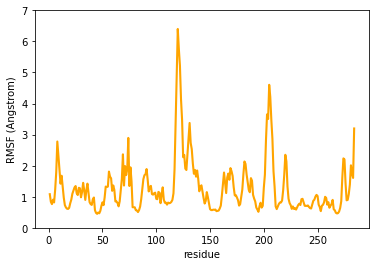

In [12]:
#Plot the data
RMSF_PLOT_FILENAME = './wtB-300-RMSF.png' #Output filename for the plot
RMSF_COLOR = 'orange' #Color of the line
plt.plot(rmsf_data.T[0], rmsf_data.T[1], linewidth=2.1, color=RMSF_COLOR)
plt.xlabel('residue')
plt.ylabel('RMSF (Angstrom)')
plt.ylim(0, 7)
plt.savefig(RMSF_PLOT_FILENAME, bbox_inches='tight')

#And write the data into a text file
RMSF_DATA_FILE= './wtB-300-RMSF.txt' #And write the data into a text file
with open(RMSF_DATA_FILE, "w") as f:
    for a, r in enumerate(rmsf_data):
        i=r[0], r[1]
        #print('{} {}'.format(int(r[0]+42), 10*r[1]))  #+42 is to change resid in the case of McoA
        f.write('{} {}'.format(int(r[0]+3), r[1])+"\n")
np.mean(rmsf_data.T[1])

In [13]:
np.std(rmsf_data.T[1])

0.8772842819395396

## 3. all_loop to all_loop RMSDs

- The RSMD of each snapshot in the trajectory with respect to all others is calculated.
- This is used to identify the different states along the trajectory, which occupation is shown in the plot as a block of similar RMSD along the diagonal. [2]
- A necessary condition for good statistics is that the system is revisiting previously sampled states, which is shown in the plot as off-diagonal peaks (regions of low RMSD between structures sampled far apart in time). If these peaks doesn't appear, the simulation is considered not converged. [2]

Calculate all-to-all RMSD matrix

In [18]:
# Calculate all-to-all RMSD matrix (it could take some time if you choose a small_loop step size!)
step_all = math.ceil(float(len(trajectoryall)/100)) # Step size: trajectory frames that will be used in the analysis (e.g. if step is 20, frames 0, 20, 40 ... will be selected)
traj_all = trajectoryall[::step_all]
#traj_all_loop = traj_all_loop.atom_slice(SELECTION)
distancesall = np.empty((math.ceil(traj_all.n_frames), math.ceil(traj_all.n_frames)))
for i, frame in enumerate(range(0, traj_all.n_frames)):
    distancesall[i] = pt.analysis.rmsd.rmsd(traj=traj_all, mask=SELECTION, ref=i, update_coordinate=False) #Fits to previous frame

Plot the data

In [19]:
all_loop_FILENAME = './wtB-300-RMSD-to-RMSD.png' #Output filename for the plot
MIN_RMSD_VALUE = 0.0 #It can be modified if you want to force the color scale of the plot to a predefined RMSD range
MAX_RMSD_VALUE = math.ceil(distancesall.max()) #It can be modified if you want to force the color scale of the plot to a predefined RMSD range
#MAX_RMSD_VALUE = 0.6

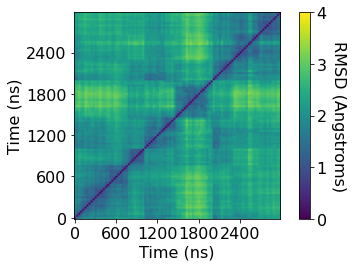

In [20]:
fig, ax = plt.subplots()
im = ax.imshow(distancesall, origin='lower', vmin=MIN_RMSD_VALUE, vmax=MAX_RMSD_VALUE)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('RMSD (Angstroms)', rotation=-90, va="bottom")

ticks = np.arange(0, len(distancesall), len(distancesall)//5)
plt.xticks(ticks, [math.ceil(a*TRAJECTORY_LENGTH_ALL/len(distancesall)) for a in ticks])
plt.yticks(ticks, [math.ceil(a*TRAJECTORY_LENGTH_ALL/len(distancesall)) for a in ticks])
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Time (ns)')

fig.tight_layout()
plt.savefig(all_loop_FILENAME, bbox_inches='tight')
plt.show()

## 4. PCA analysis with time (based on https://amber-md.github.io/pytraj/latest/tutorials/tutorial_pca.html)

Another manner to analyse the states visited along the trajectory is by creating a two component PCA model. 
It projects our data (cartesian coordinates) into a reduced dimensional space that is considered representative of the main movements of the system.

Again, a well sampled simulation would exhibit a large number of transitions among substates. [2] In this plot, this can be seen as points of different color in the same zone. For example, if a zone has purple points (corresponding to the initial part of the simulation) and yellow points (corresponding to the final part) would be an indicative of leaving and returning to this substate. As said, high number of such transitions would be a sign of good sampling.

Calculate two-Principal Component data matrix

In [25]:
#step_PCA = math.ceil(float(len(trajectory)/3334)) # Step size: trajectory frames that will be used in the analysis (e.g. if step is 20, frames 0, 20, 40 ... will be selected)
step_PCA = 5
traj_PCA = trajectoryall[::step_PCA]
#traj_PCA = trajectory
data = pt.pca(traj_PCA, mask=SELECTION, n_vecs=2) #If no ref is given, fits to average structure
projection_data = data[0]

Plot the data coloured by simulation time

In [26]:
PCA_FILENAME = './wtB-300-PCA-t.png' #Output filename for the plot

MIN_X_VALUE = math.floor(projection_data[0].min(axis=0)) #It can be modified if you want to force the scale of the plot
MAX_X_VALUE = math.ceil(projection_data[0].max(axis=0)) #It can be modified if you want to force the scale of the plot
MIN_Y_VALUE = math.floor(projection_data[1].min(axis=0)) #It can be modified if you want to force the scale of the plot
MAX_Y_VALUE = math.ceil(projection_data[1].max(axis=0)) #It can be modified if you want to force the scale of the plot
POINTS_SIZE = 3 #You can adjust the size of the points of the plot

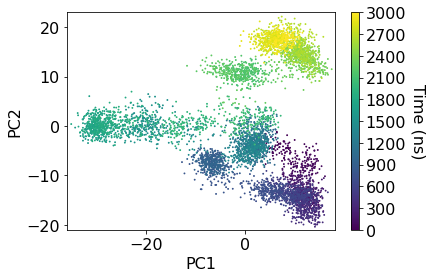

In [27]:
plt.figure()
plt.scatter(projection_data[0], projection_data[1], marker='.', c=range(len(traj_PCA)), vmin=0, vmax=len(traj_PCA), s=POINTS_SIZE)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([MIN_X_VALUE, MAX_X_VALUE])
plt.ylim([MIN_Y_VALUE, MAX_Y_VALUE])
cbar = plt.colorbar(aspect=30)
ticks = np.arange(0, len(traj_PCA), len(traj_PCA)//10)
cbar.set_ticks(ticks)
cbar.ax.tick_params()
cbar.set_ticklabels([math.ceil(a*TRAJECTORY_LENGTH_ALL/len(traj_PCA)) for a in ticks])
cbar.set_label('Time (ns)', rotation=-90, va="bottom")
plt.savefig(PCA_FILENAME, bbox_inches='tight')